In [1]:
import os
os.chdir("../../../../")

In [2]:
import matplotlib.pyplot as plt
from utilities import plot,errors
import pandas as pd
from utilities.recalibration import *
from sklearn.isotonic import IsotonicRegression
import numpy as np


In [3]:
training_predictions_df=pd.read_csv("/home/interns/Hetvi/NILM_Uncertainty/notebooks/dishwasher/lstm/gmlp/training_predictions.csv")
testing_predictions_df = pd.read_csv("/home/interns/Hetvi/NILM_Uncertainty/notebooks/dishwasher/lstm/gmlp/testing_predictions.csv")
cal_predictions_df= pd.read_csv("/home/interns/Hetvi/NILM_Uncertainty/notebooks/dishwasher/lstm/gmlp/calibration_predictions.csv")

In [4]:
y_train=training_predictions_df['Ground Truth']
train_mean=training_predictions_df['mean']
train_sigma=training_predictions_df['sigma']
mc_train_mean=training_predictions_df['MC_mean']
mc_train_sigma=training_predictions_df['MC_sigma']
de_train_mean=training_predictions_df['DE_mean']
de_train_sigma=training_predictions_df['DE_sigma']
bs_train_mean=training_predictions_df['BS_mean']
bs_train_sigma=training_predictions_df['BS_sigma']

y_cal=cal_predictions_df['Ground Truth']
cal_mean=cal_predictions_df['mean']
cal_sigma=cal_predictions_df['sigma']
mc_cal_mean=cal_predictions_df['MC_Mean']
mc_cal_sigma=cal_predictions_df['MC_Sigma']
de_cal_mean=cal_predictions_df['DE_mean']
de_cal_sigma=cal_predictions_df['DE_sigma']
bs_cal_mean=cal_predictions_df['bs_Mean']
bs_cal_sigma=cal_predictions_df['bs_Sigma']

y_test=testing_predictions_df['Ground Truth']
test_mean=testing_predictions_df['mean']
test_sigma=testing_predictions_df['sigma']
mc_test_mean=testing_predictions_df['MC_Mean']
mc_test_sigma=testing_predictions_df['MC_Sigma'] 
de_test_mean=testing_predictions_df['de_Mean']
de_test_sigma=testing_predictions_df['de_Sigma']
bs_test_mean=testing_predictions_df['bs_Mean']
bs_test_sigma=testing_predictions_df['bs_Sigma']

In [5]:
def error(ideal,predicted):
    return np.mean(np.abs(ideal-predicted.reshape(predicted.shape[0],)))

In [6]:
series_train = find_p_hat(y_train,train_mean,train_sigma)
series_test = find_p_hat(y_test,test_mean,test_sigma)
series_cal= find_p_hat(y_cal,cal_mean,cal_sigma)

In [7]:
calibrator = IsotonicRegression(out_of_bounds='clip')
calibrator,h_xt_yt,P_hat=isotonic_regression_fit(calibrator,y_cal,cal_mean,cal_sigma)

In [8]:
## New quantiles
p=np.linspace(1e-10, 1-1e-10, 1000)
new_p=calibrator.predict(p)
print(new_p.shape)

(1000,)


In [9]:
new_p_hat_train=find_new_p_hat(y_train,new_p,mc_train_mean,mc_train_sigma)
new_p_hat_cal=find_new_p_hat(y_cal,new_p,mc_cal_mean,mc_cal_sigma)
new_p_hat_test=find_new_p_hat(y_test,new_p,mc_test_mean,mc_test_sigma)


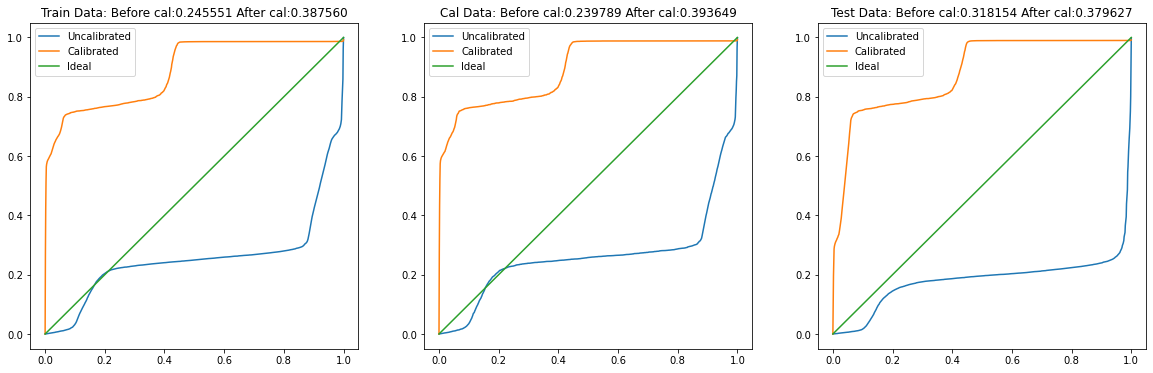

In [10]:

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(p, series_train.values, label='Uncalibrated')
plt.plot(p, new_p_hat_train, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Train Data: Before cal:{error(p,series_train.values):2f} After cal:{error(p,new_p_hat_train):2f}")
plt.legend()

plt.subplot(1,3,2)
plt.plot(p, series_cal.values, label='Uncalibrated')
plt.plot(p, new_p_hat_cal, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Cal Data: Before cal:{error(p,series_cal.values):2f} After cal:{error(p,new_p_hat_cal):2f}")
plt.legend()

plt.subplot(1,3,3)
plt.plot(p, series_test.values, label='Uncalibrated')
plt.plot(p, new_p_hat_test, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Test Data: Before cal:{error(p,series_test.values):2f} After cal:{error(p,new_p_hat_test):2f}")
plt.legend()

## MC Dropout

In [11]:

series_train = find_p_hat(y_train,mc_train_mean,mc_train_sigma)
series_test = find_p_hat(y_test,mc_test_mean,mc_test_sigma)
series_cal= find_p_hat(y_cal,mc_cal_mean,mc_cal_sigma)

In [12]:
calibrator_mc = IsotonicRegression(out_of_bounds='clip')
calibrator_mc,h_xt_yt,P_hat=isotonic_regression_fit(calibrator_mc,y_cal,mc_cal_mean,mc_cal_sigma)


In [13]:
new_p=calibrator_mc.predict(p)

In [14]:
new_p_hat_train=find_new_p_hat(y_train,new_p,mc_train_mean,mc_train_sigma)
new_p_hat_cal=find_new_p_hat(y_cal,new_p,mc_cal_mean,mc_cal_sigma)
new_p_hat_test=find_new_p_hat(y_test,new_p,mc_test_mean,mc_test_sigma)

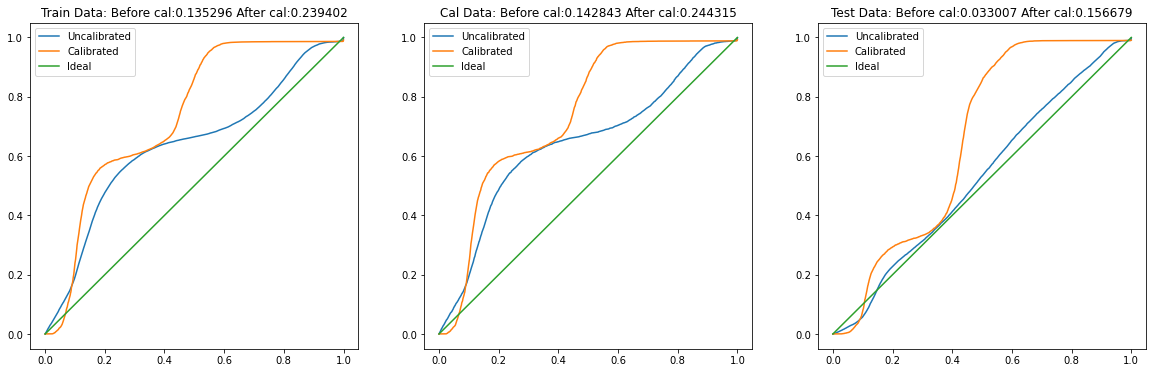

In [15]:

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(p, series_train.values, label='Uncalibrated')
plt.plot(p, new_p_hat_train, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Train Data: Before cal:{error(p,series_train.values):2f} After cal:{error(p,new_p_hat_train):2f}")
plt.legend()

plt.subplot(1,3,2)
plt.plot(p, series_cal.values, label='Uncalibrated')
plt.plot(p, new_p_hat_cal, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Cal Data: Before cal:{error(p,series_cal.values):2f} After cal:{error(p,new_p_hat_cal):2f}")
plt.legend()

plt.subplot(1,3,3)
plt.plot(p, series_test.values, label='Uncalibrated')
plt.plot(p, new_p_hat_test, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Test Data: Before cal:{error(p,series_test.values):2f} After cal:{error(p,new_p_hat_test):2f}")
plt.legend()

## Deep ensemble

In [16]:
series_train = find_p_hat(y_train,de_train_mean,de_train_sigma)
series_test = find_p_hat(y_test,de_test_mean,de_test_sigma)
series_cal= find_p_hat(y_cal,de_cal_mean,de_cal_sigma)

In [17]:
calibrator_de = IsotonicRegression(out_of_bounds='clip')
calibrator_de,h_xt_yt,P_hat=isotonic_regression_fit(calibrator_de,y_cal,de_cal_mean,de_cal_sigma)
new_p=calibrator_de.predict(p)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
# ax.scatter(h_xt_yt, P_hat, alpha=0.7)
# ax.plot([0,1],[0,1],'--', color='grey')
# ax.set_xlabel('Predicted')
# ax.set_ylabel('Empirical');

In [18]:
new_p_hat_train=find_new_p_hat(y_train,new_p,de_train_mean,de_train_sigma)
new_p_hat_cal=find_new_p_hat(y_cal,new_p,de_cal_mean,de_cal_sigma)
new_p_hat_test=find_new_p_hat(y_test,new_p,de_test_mean,de_test_sigma)

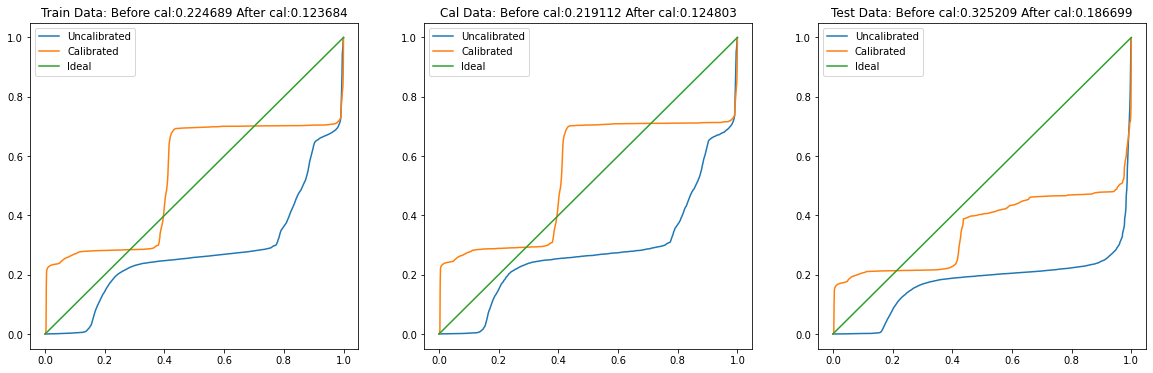

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(p, series_train.values, label='Uncalibrated')
plt.plot(p, new_p_hat_train, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Train Data: Before cal:{error(p,series_train.values):2f} After cal:{error(p,new_p_hat_train):2f}")
plt.legend()

plt.subplot(1,3,2)
plt.plot(p, series_cal.values, label='Uncalibrated')
plt.plot(p, new_p_hat_cal, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Cal Data: Before cal:{error(p,series_cal.values):2f} After cal:{error(p,new_p_hat_cal):2f}")
plt.legend()

plt.subplot(1,3,3)
plt.plot(p, series_test.values, label='Uncalibrated')
plt.plot(p, new_p_hat_test, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Test Data: Before cal:{error(p,series_test.values):2f} After cal:{error(p,new_p_hat_test):2f}")
plt.legend()

## Bootstrap

In [20]:
series_train = find_p_hat(y_train,bs_train_mean,bs_train_sigma)
series_test = find_p_hat(y_test,bs_test_mean,bs_test_sigma)
series_cal= find_p_hat(y_cal,bs_cal_mean,bs_cal_sigma)

In [21]:
calibrator_bs = IsotonicRegression(out_of_bounds='clip')
calibrator_bs,h_xt_yt,P_hat=isotonic_regression_fit(calibrator_bs,y_cal,bs_cal_mean,bs_cal_sigma)
new_p=calibrator_bs.predict(p)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
# ax.scatter(h_xt_yt, P_hat, alpha=0.7)
# ax.plot([0,1],[0,1],'--', color='grey')
# ax.set_xlabel('Predicted')
# ax.set_ylabel('Empirical')

In [22]:
new_p_hat_train=find_new_p_hat(y_train,new_p,bs_train_mean,bs_train_sigma)
new_p_hat_cal=find_new_p_hat(y_cal,new_p,bs_cal_mean,bs_cal_sigma)
new_p_hat_test=find_new_p_hat(y_test,new_p,bs_test_mean,bs_test_sigma)

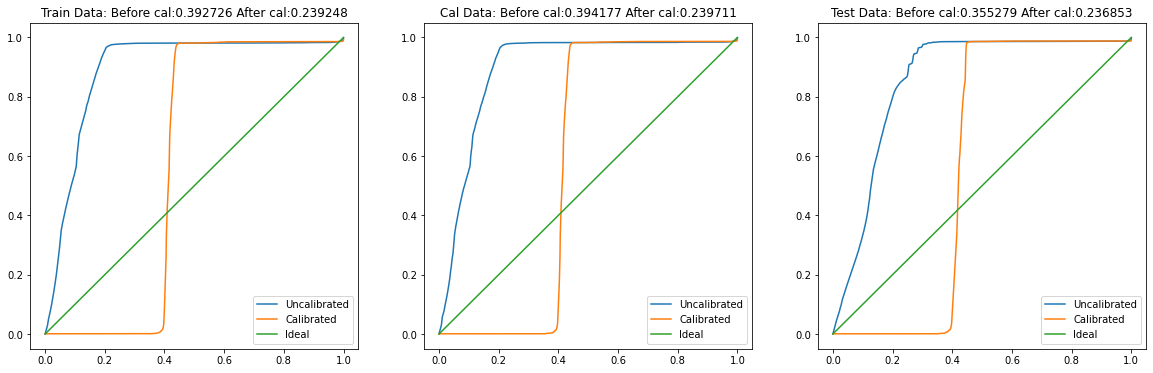

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(p, series_train.values, label='Uncalibrated')
plt.plot(p, new_p_hat_train, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Train Data: Before cal:{error(p,series_train.values):2f} After cal:{error(p,new_p_hat_train):2f}")
plt.legend()

plt.subplot(1,3,2)
plt.plot(p, series_cal.values, label='Uncalibrated')
plt.plot(p, new_p_hat_cal, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Cal Data: Before cal:{error(p,series_cal.values):2f} After cal:{error(p,new_p_hat_cal):2f}")
plt.legend()

plt.subplot(1,3,3)
plt.plot(p, series_test.values, label='Uncalibrated')
plt.plot(p, new_p_hat_test, label='Calibrated')
plt.plot([0, 1], [0, 1], label="Ideal")
plt.title(f"Test Data: Before cal:{error(p,series_test.values):2f} After cal:{error(p,new_p_hat_test):2f}")
plt.legend()